***Initial Setup***

In [51]:
# importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [52]:
# loading data

data = pd.read_csv('./datasets/iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
data['class'] = data['class'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0, 1, 2])
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


***Inspecting data***

In [53]:
print(data.info(), '\n', data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None 
        sepal_length  sepal_width  petal_length  petal_width       class
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    1.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000  

***Feature Engineering***

In [54]:
# defining X and y

X = np.array(data.drop(['class'], axis=1))
y = np.array(data['class'])

In [55]:
# train-test splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# normalizing data in X_train and X_test

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

***Models***

In [57]:
# initializing and running Decision Tree model with default parameters

clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f'Predicted labels: {y_pred}')
print(f'Actual labels:    {y_test}')
print(f'Training score: {clf.score(X_train, y_train)}')
print(f'Testing score:  {clf.score(X_test, y_test)}')

Predicted labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Actual labels:    [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Training score: 1.0
Testing score:  1.0


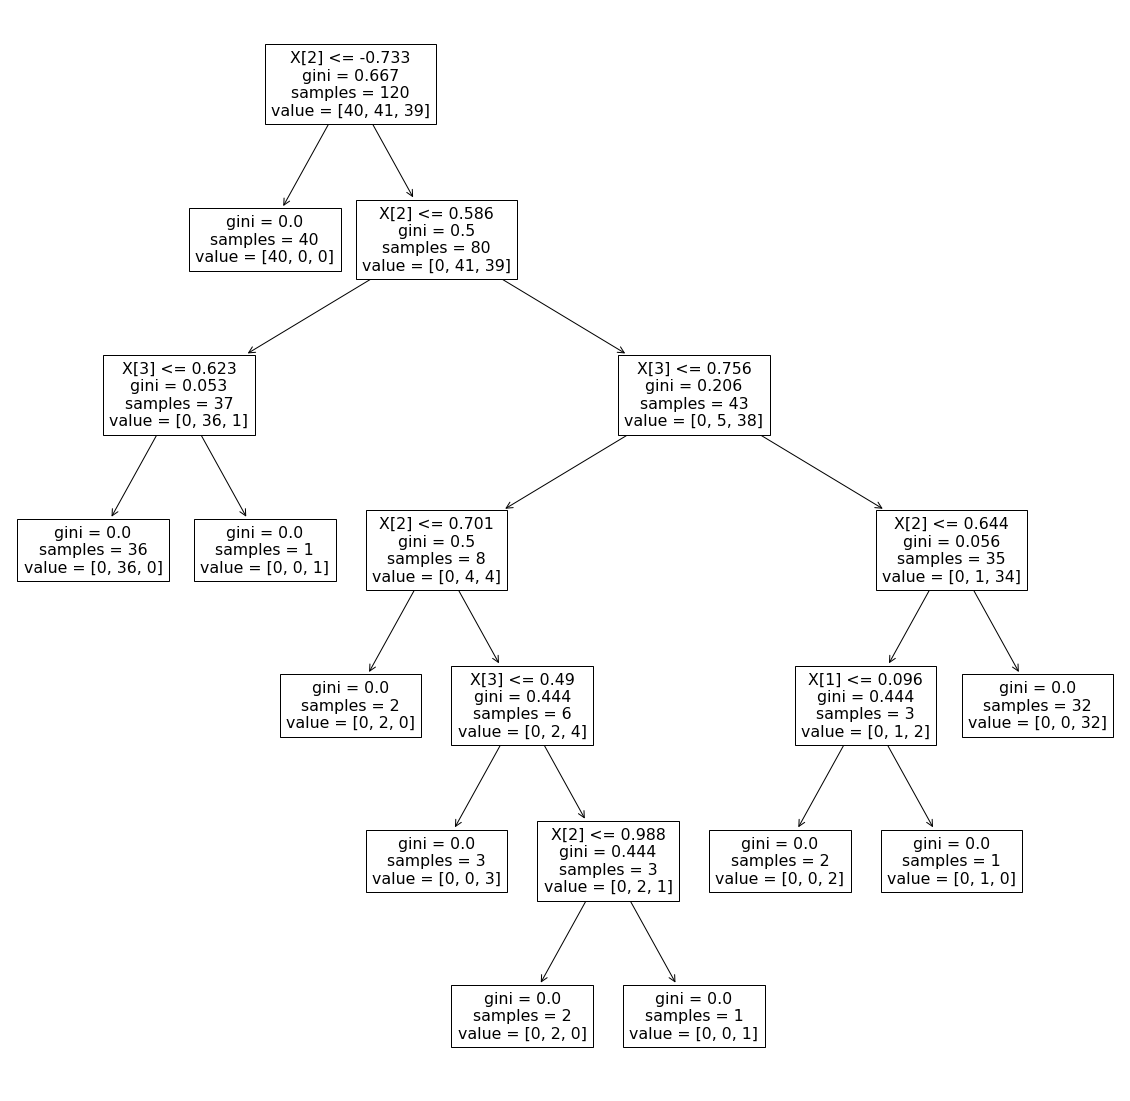

In [58]:
plt.figure(figsize=(20, 20))
tree.plot_tree(clf)
plt.show()

In [59]:
# playing with RandomizedSearchCV to find best parameters for Decision Tree

param = {'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': ['None', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'min_samples_split': [2, 3, 4],
        'random_state': [42, 0, 13]}

trees = DecisionTreeClassifier()

tree_random = RandomizedSearchCV(trees, param)

tree_random.fit(X_train, y_train)

print(f"Best Decision Tree Parameters: {tree_random.best_params_}")
print(f"Best score is {tree_random.best_score_}")

Best Decision Tree Parameters: {'splitter': 'random', 'random_state': 0, 'min_samples_split': 4, 'max_depth': 5, 'criterion': 'entropy'}
Best score is 0.95


In [60]:
# initializing and running Random Forest with default parameters

rfc = RandomForestClassifier(random_state=42).fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(f'Predicted labels: {y_pred}')
print(f'Actual labels:    {y_test}')
print(f'Training score: {clf.score(X_train, y_train)}')
print(f'Testing score:  {clf.score(X_test, y_test)}')

Predicted labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 1 0 2 2 2 2 2 0 0]
Actual labels:    [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Training score: 1.0
Testing score:  1.0


In [61]:
# playing with RandomizedSearchCV to find best parameters for Random Forest

param = {'n_estimators' : [100, 200, 300, 400, 500],
        'criterion': ['gini', 'entropy'],
        'max_depth': ['None', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'min_samples_split': [2, 3, 4],
        'bootstrap': ['True', 'False'],
        'random_state': [42, 0, 13]}

forest = RandomForestClassifier()

forest_random = RandomizedSearchCV(forest, param)

forest_random.fit(X_train, y_train)

print(f"Best Random Forest Parameters: {forest_random.best_params_}")
print(f"Best score is {forest_random.best_score_}")

Best Random Forest Parameters: {'random_state': 42, 'n_estimators': 400, 'min_samples_split': 3, 'max_depth': 9, 'criterion': 'entropy', 'bootstrap': 'True'}
Best score is 0.9583333333333334
